In [1]:
!python flow/visualize/visualizer_rllib.py\
/home/michael/ray_results/singleagent_figure_eight/PPO_AccelEnv-v0_1dcc7_00000_0_2022-11-20_11-02-29/ 107\
--num_rollouts 10

2022-11-21 21:40:10,257	INFO services.py:1247 -- View the Ray dashboard at http://127.0.0.1:8265
2022-11-21 21:40:10,829	INFO trainer.py:720 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2022-11-21 21:40:12,101	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2022-11-21 21:40:12,203	INFO trainable.py:383 -- Restored on 192.168.1.65 from checkpoint: /home/michael/ray_results/singleagent_figure_eight/PPO_AccelEnv-v0_1dcc7_00000_0_2022-11-20_11-02-29/checkpoint_107/checkpoint-107
2022-11-21 21:40:12,203	INFO trainable.py:390 -- Current state after restoring: {'_iteration': 107, '_timesteps_total': None, '_time_total': 22691.25173664093, '_episodes_total': 1070}
2022-11-21 21:40:14,448	WARNING deprecation.py:34 -- DeprecationWarning: `compute_action` has been deprecated. Use `compute_single_action` instead. This will raise an error in the future!
Round 0, Return: 360.37569124389586
Round 1, Return: 372.5003

### Trial Results Directory Name

In [2]:
results_dir_name = "trial_results"

## Mean Over Rollout

In [3]:
import numpy as np

mean_collector = []

with open(f"./michael_files/{results_dir_name}/avg_velocity.txt", "r+") as f:
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])
        mean_vehs = np.mean(data)
        mean_collector.append(mean_vehs)
        print(f"Mean Velocity Over Rollout: {mean_vehs}")
        with open(f"./michael_files/{results_dir_name}/mean_rollout_velocity.txt", "a") as g:
            g.write(f"Mean Velocity Over Rollout: {mean_vehs}\n")

with open(f"./michael_files/{results_dir_name}/mean_rollout_velocity.txt", "a") as g:
    mean_rollout = np.mean(mean_collector)
    std_rollout = np.std(mean_collector)
    var_rollout = np.var(mean_collector)
    
    g.write(f"Mean of Rollouts: {mean_rollout}\n")
    g.write(f"Std of Rollouts: {std_rollout}\n")
    g.write(f"Variance of Rollouts: {var_rollout}\n")

Mean Velocity Over Rollout: 5.387582023178836
Mean Velocity Over Rollout: 5.4611482527611415
Mean Velocity Over Rollout: 5.312099627326865
Mean Velocity Over Rollout: 5.574766209931125
Mean Velocity Over Rollout: 5.615917245034208
Mean Velocity Over Rollout: 5.200057927150951
Mean Velocity Over Rollout: 5.561172329772565
Mean Velocity Over Rollout: 5.462195917558653
Mean Velocity Over Rollout: 5.190769749377462
Mean Velocity Over Rollout: 5.532038944535457


## Mean and Min for Last 100 Seconds

In [4]:
import numpy as np

mean_collector = []

with open(f"./michael_files/{results_dir_name}/avg_velocity.txt", "r+") as f:
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])
        mean_last_100_seconds = np.mean(data[-1000:])
        mean_collector.append(mean_last_100_seconds)
        print(f"Mean Last 100 Seconds: {mean_last_100_seconds}")
        with open(f"./michael_files/{results_dir_name}/last_100_seconds.txt", "a") as g:
            g.write(f"Mean Last 100 Seconds: {mean_last_100_seconds}\n")

print(f"Mean of last 100 secs over rollouts: {np.mean(mean_collector)}")

with open(f"./michael_files/{results_dir_name}/last_100_seconds.txt", "a") as g:
    g.write(f"Mean of last 100 secs over rollouts: {np.mean(mean_collector)}\n")
    
    std_100 = np.std(mean_collector)
    var_100 = np.var(mean_collector)
    
    g.write(f"Std of last 100 secs over rollouts: {std_100}\n")
    g.write(f"Variance of last 100 secs over rollouts: {var_100}\n")

Mean Last 100 Seconds: 5.0543583922087425
Mean Last 100 Seconds: 5.132464444834779
Mean Last 100 Seconds: 5.093580512772961
Mean Last 100 Seconds: 5.359816870336732
Mean Last 100 Seconds: 5.425691092809452
Mean Last 100 Seconds: 4.9217332460165855
Mean Last 100 Seconds: 5.2466335916059545
Mean Last 100 Seconds: 5.206034826664179
Mean Last 100 Seconds: 4.933681024773358
Mean Last 100 Seconds: 5.407033840494092
Mean of last 100 secs over rollouts: 5.178102784251683


In [5]:
import numpy as np

with open(f"./michael_files/{results_dir_name}/min_velocity.txt", "r+") as f:
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])
        min_last_100_seconds = np.min(data[-1000:])
        print(f"Min Last 100 Seconds: {min_last_100_seconds}")
        with open(f"./michael_files/{results_dir_name}/last_100_seconds.txt", "a") as g:
            g.write(f"Min Last 100 Seconds: {min_last_100_seconds}\n")

Min Last 100 Seconds: 0.0
Min Last 100 Seconds: 0.0
Min Last 100 Seconds: 0.0
Min Last 100 Seconds: 0.0
Min Last 100 Seconds: 0.0
Min Last 100 Seconds: 0.0
Min Last 100 Seconds: 0.0
Min Last 100 Seconds: 0.0
Min Last 100 Seconds: 0.0
Min Last 100 Seconds: 0.0


## Charting Avg. Velocity for All Vehicles

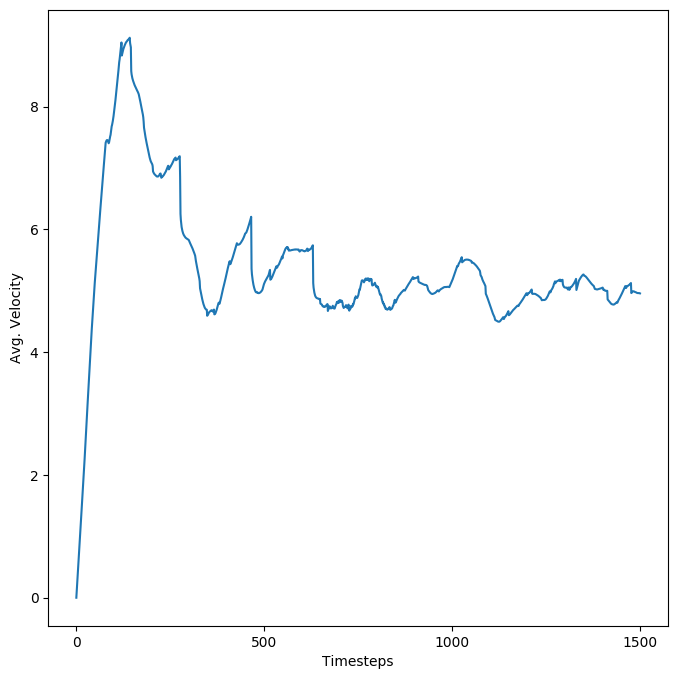

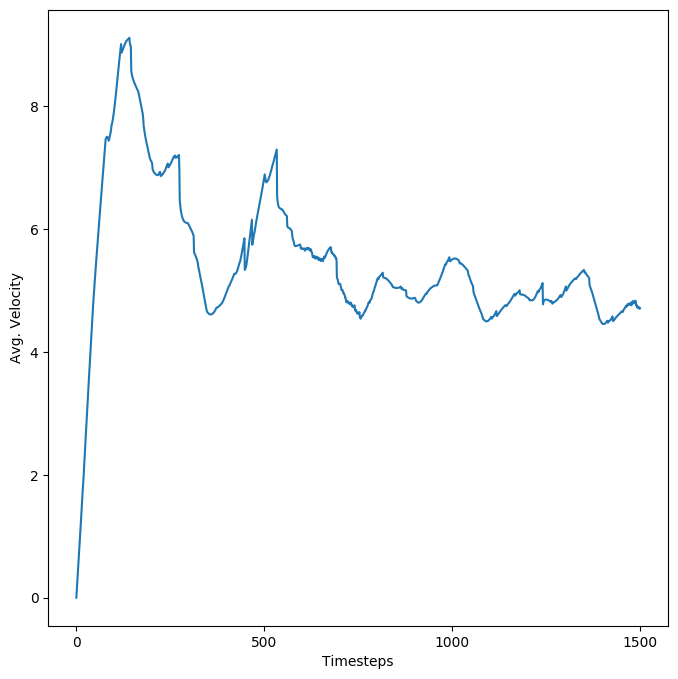

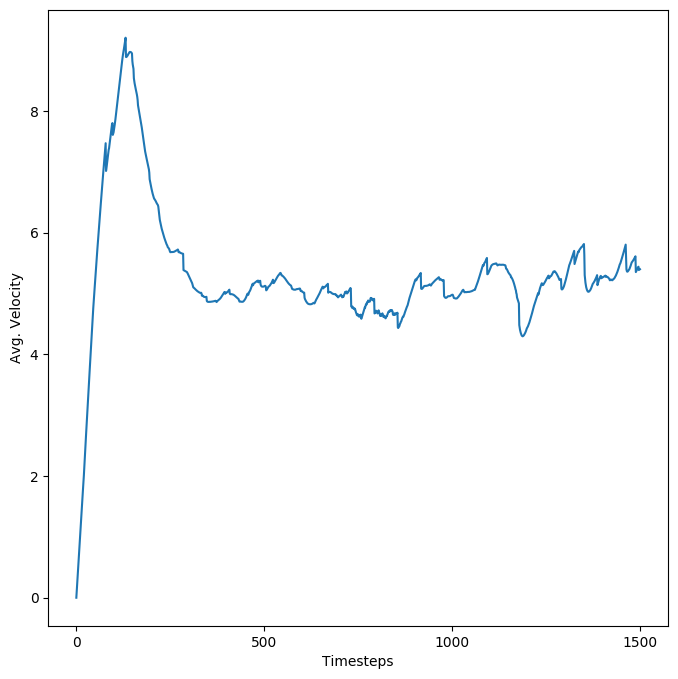

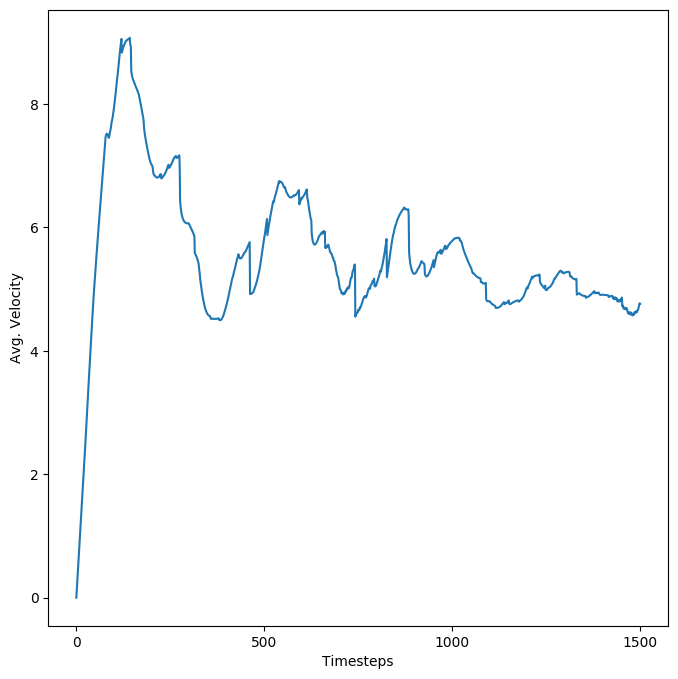

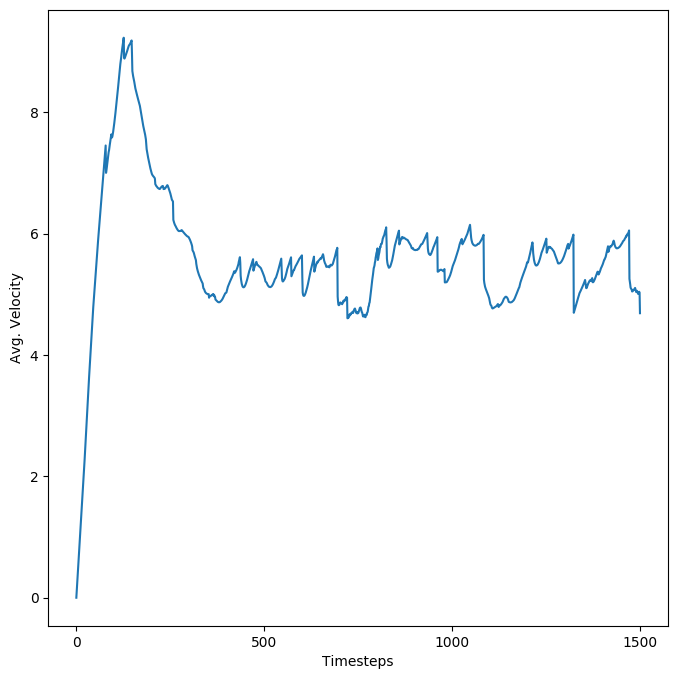

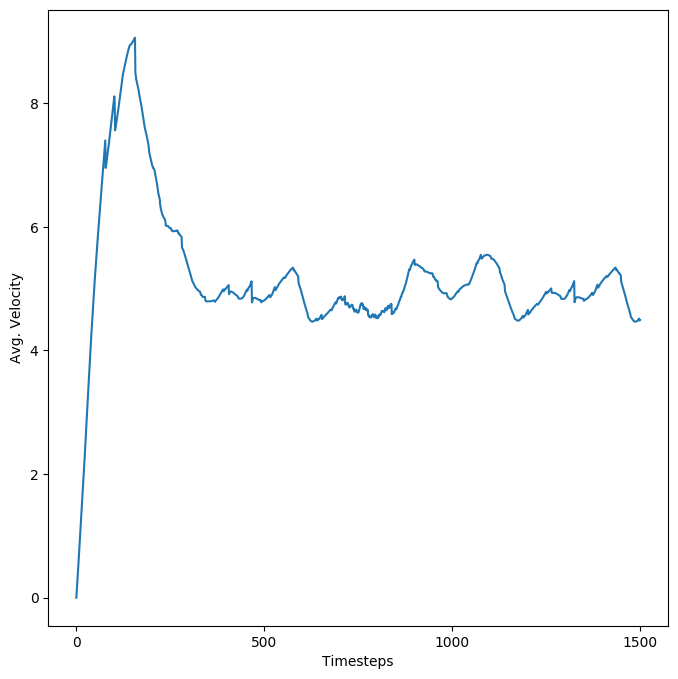

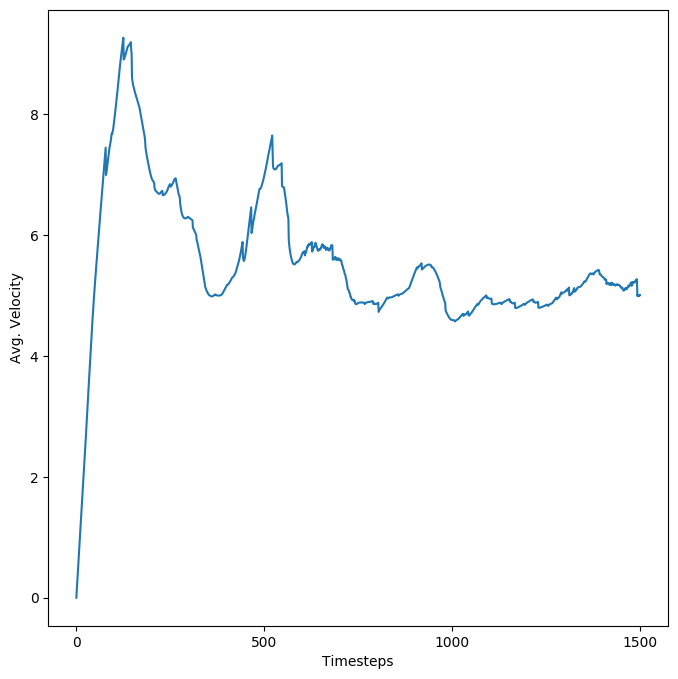

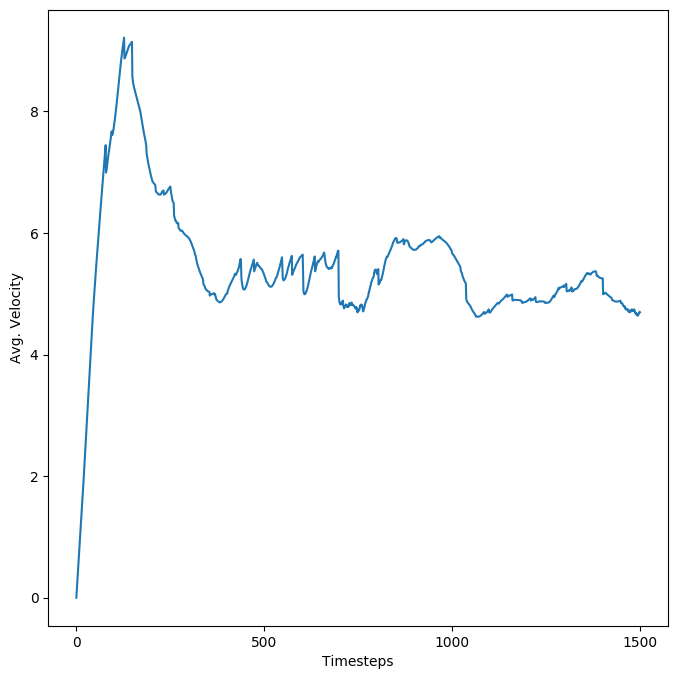

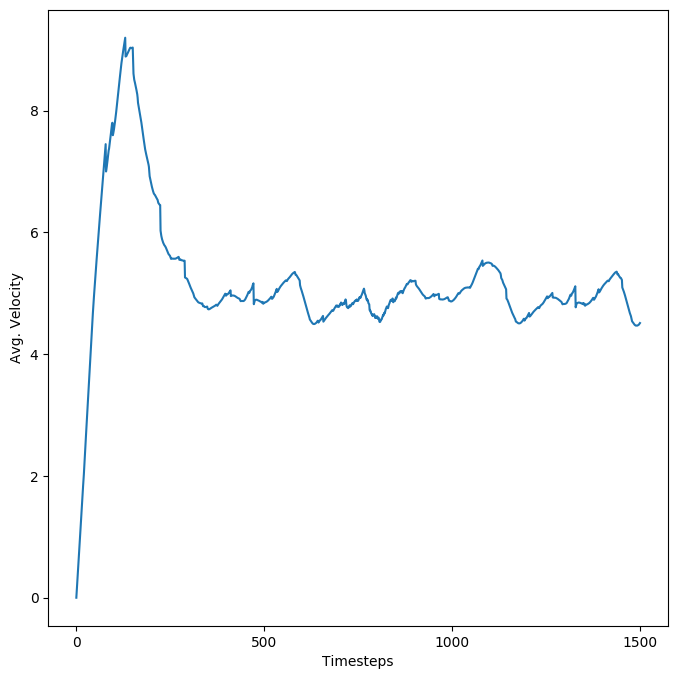

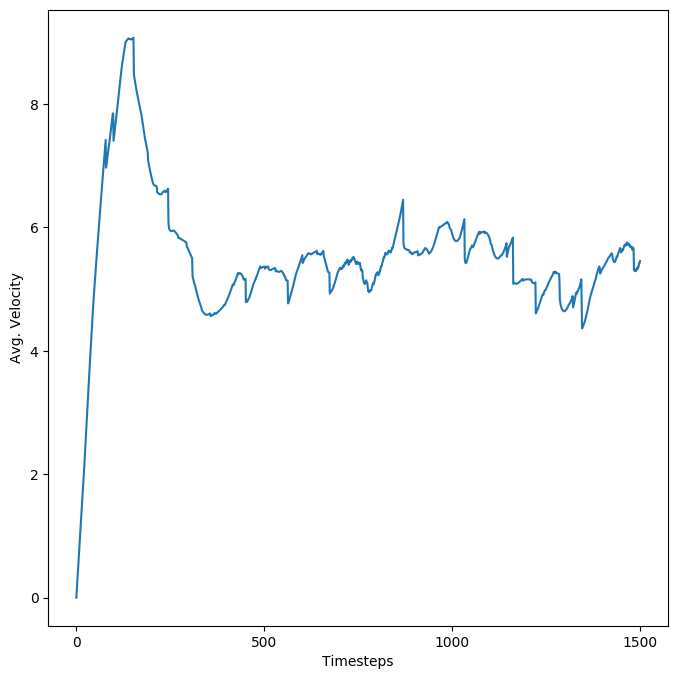

In [6]:
import numpy as np
import matplotlib.pyplot as plt

with open(f"./michael_files/{results_dir_name}/avg_velocity.txt", "r+") as f:
    count = 0
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])

        fig, ax = plt.subplots(figsize=(8,8), dpi=100)
        xticks = np.arange(0,len(data)+1,500)
        ax.set_ylabel("Avg. Velocity")
        ax.set_xlabel("Timesteps")
        ax.plot(data)
        ax.set_xticks(xticks) 
        fig.savefig(f"./michael_files/{results_dir_name}/avg_velocity{count}.png")
        
        count += 1

## Charting RL Velocity

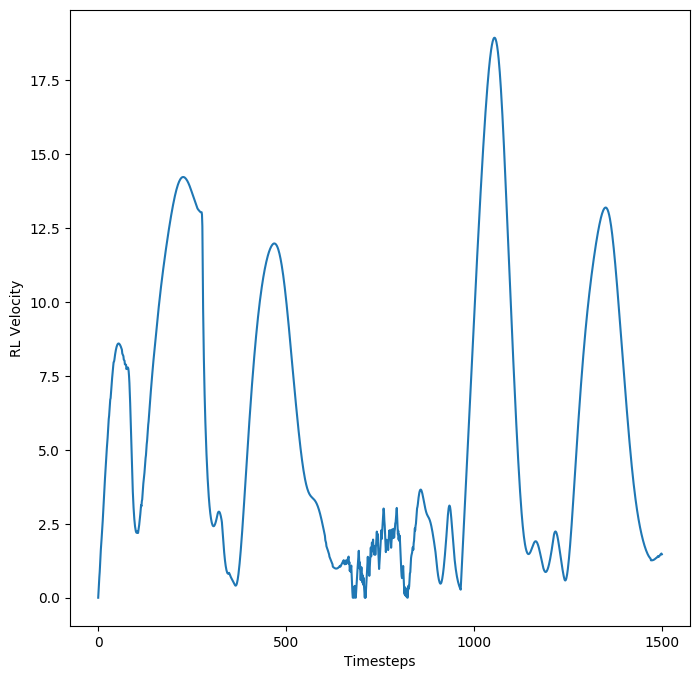

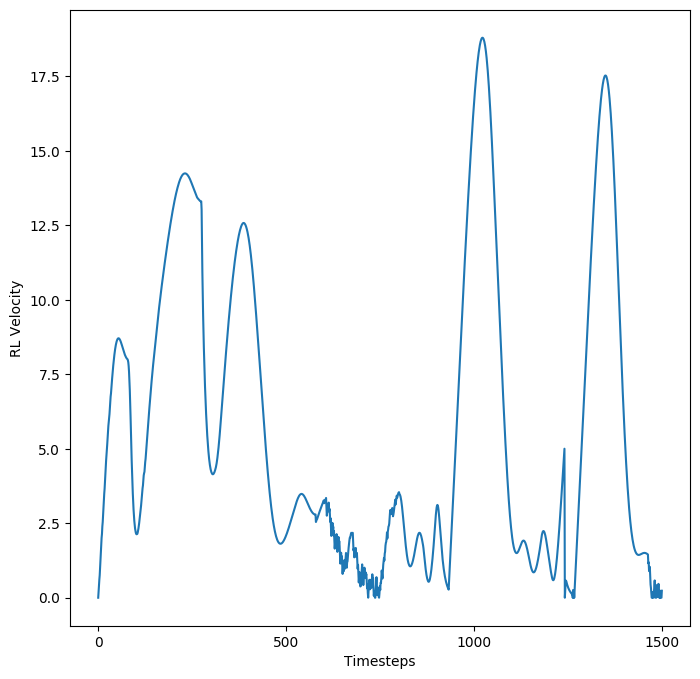

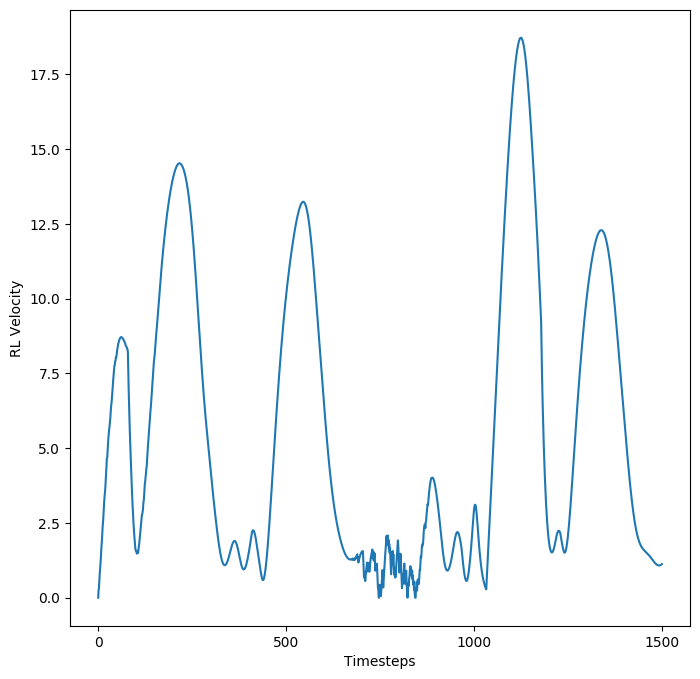

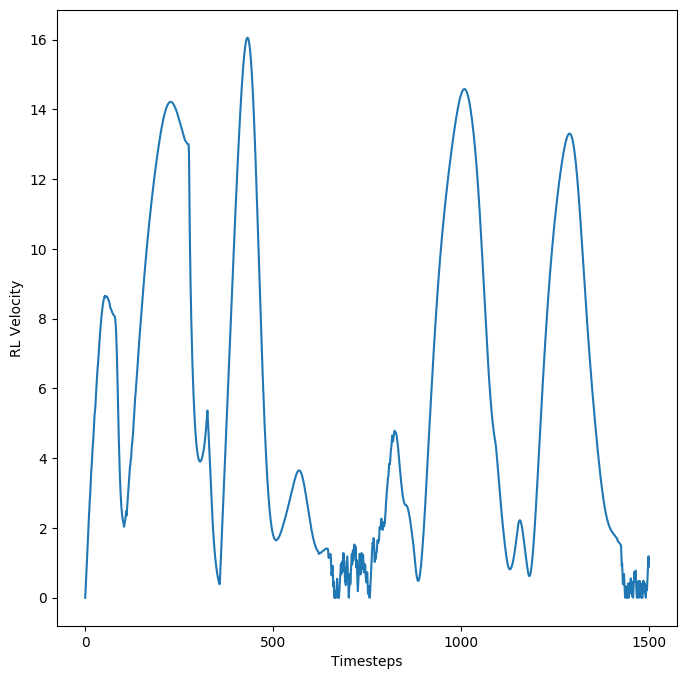

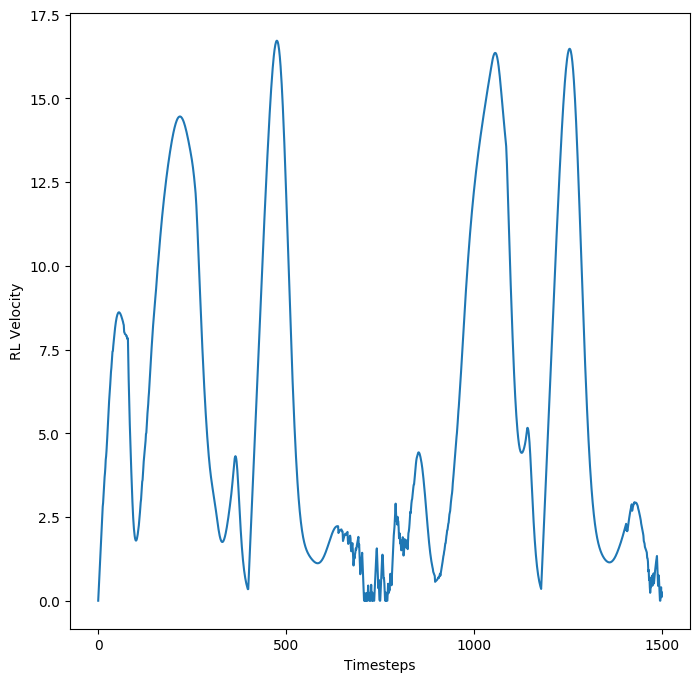

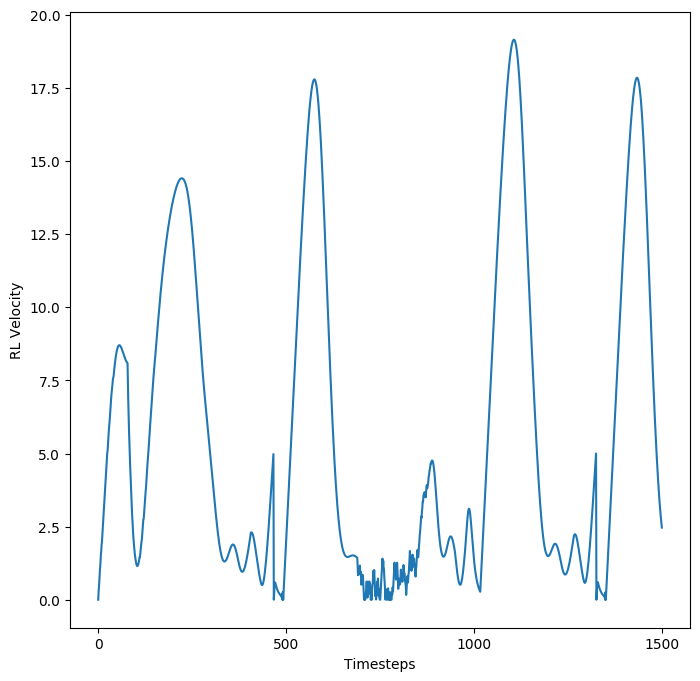

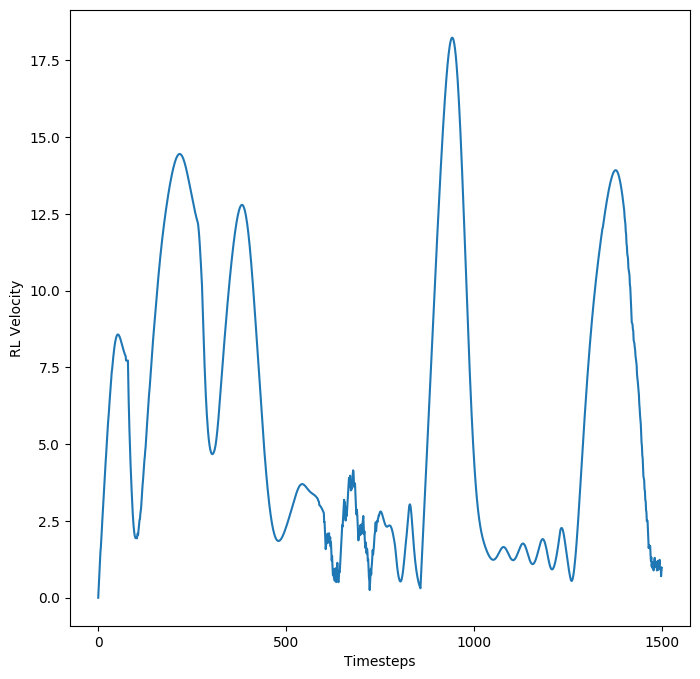

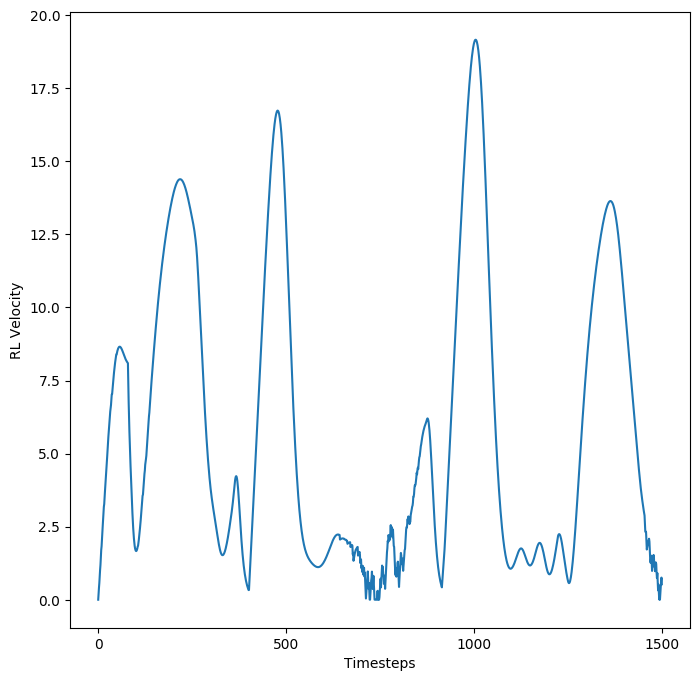

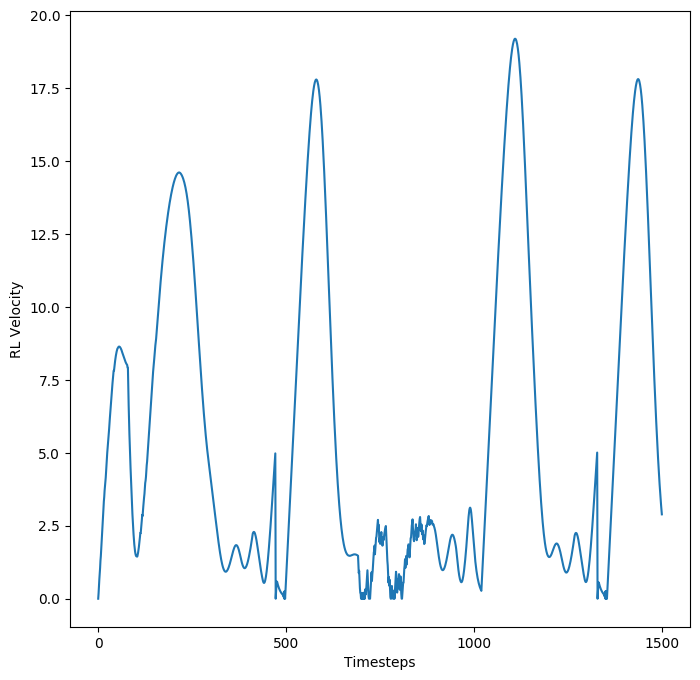

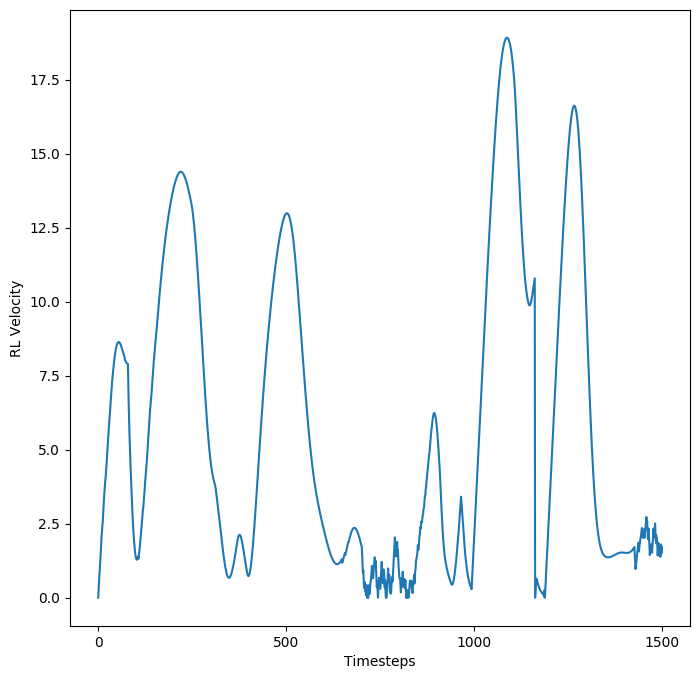

In [7]:
import numpy as np
import matplotlib.pyplot as plt

with open(f"./michael_files/{results_dir_name}/rl_velocity.txt", "r+") as f:
    count = 0
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])

        fig, ax = plt.subplots(figsize=(8,8), dpi=100)
        xticks = np.arange(0,len(data)+1,500)
        ax.set_ylabel("RL Velocity")
        ax.set_xlabel("Timesteps")
        ax.plot(data)
        ax.set_xticks(xticks) 
        fig.savefig(f"./michael_files/{results_dir_name}/rl_velocity{count}.png")
        
        count += 1

## Charting RL Realized Acceleration

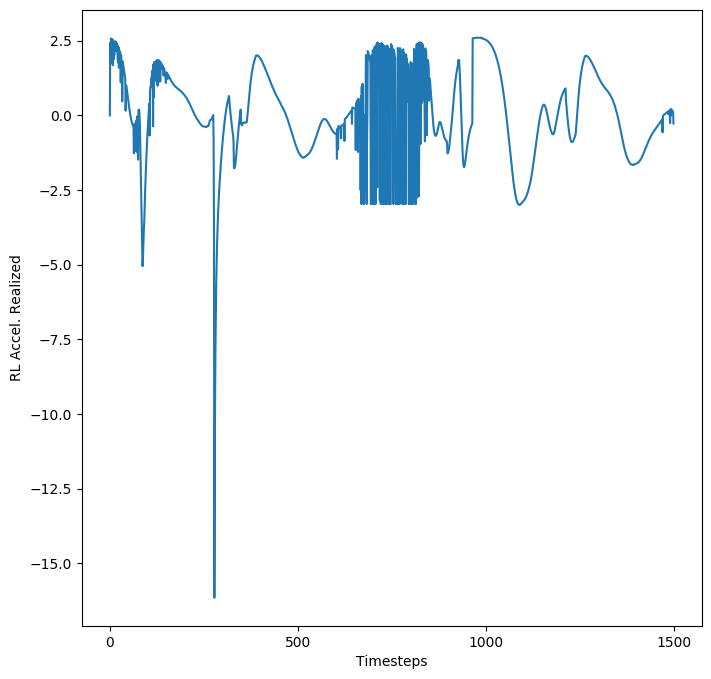

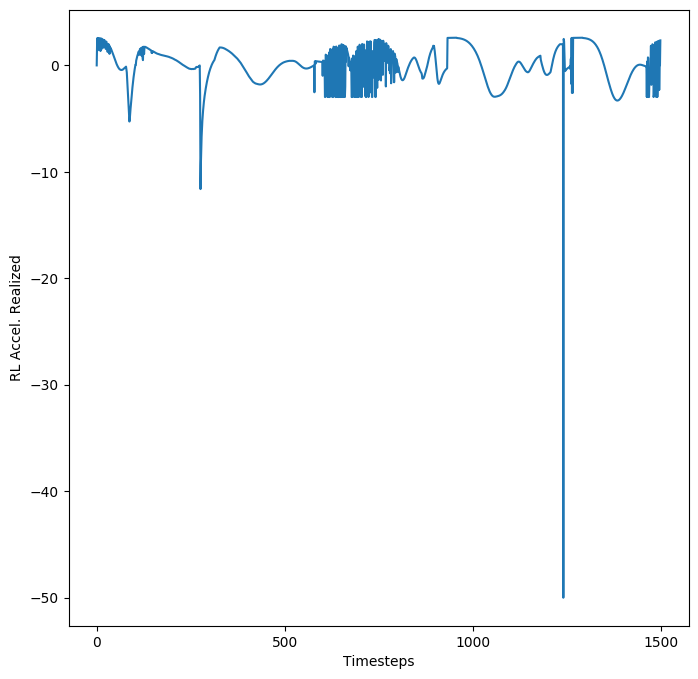

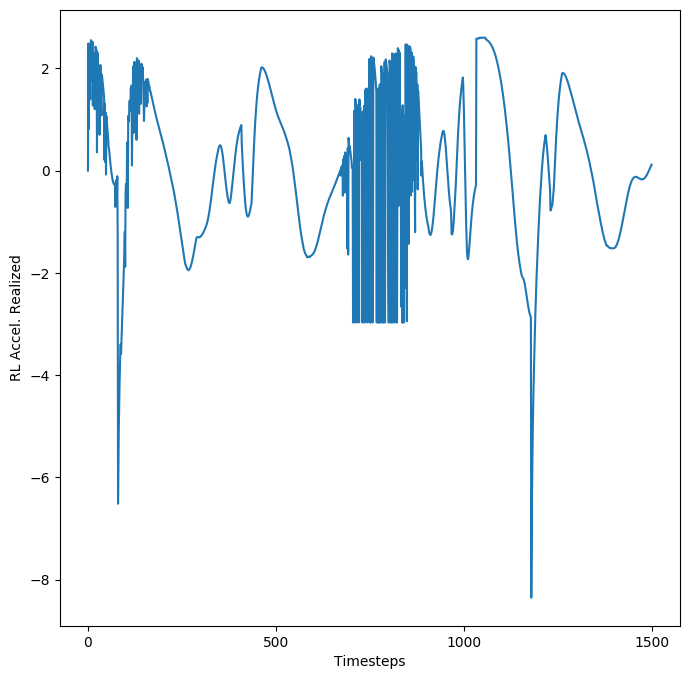

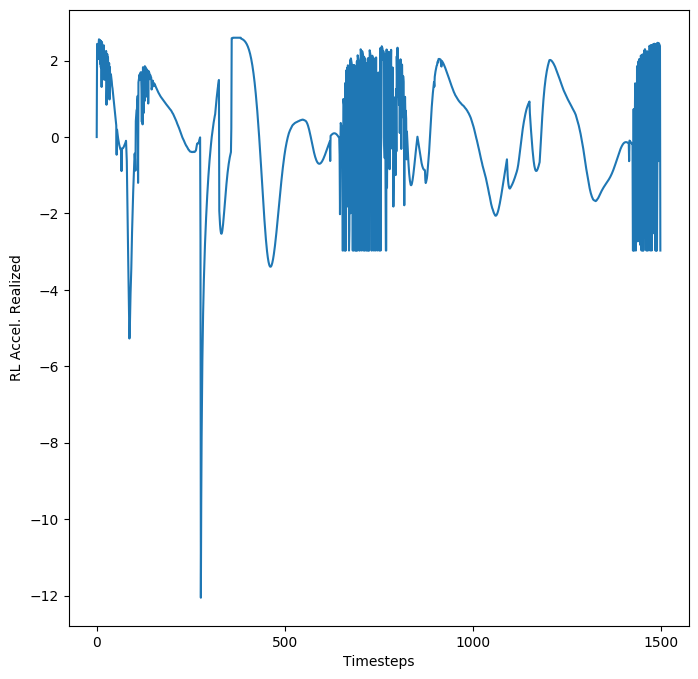

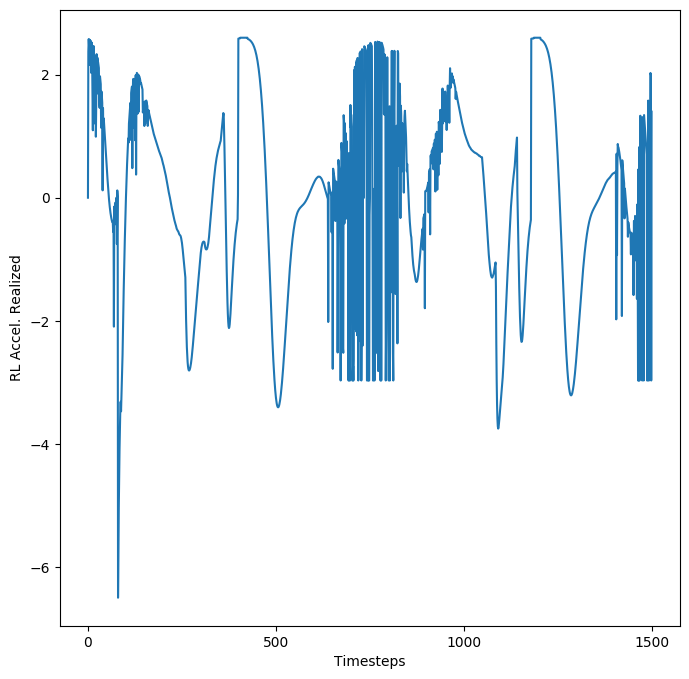

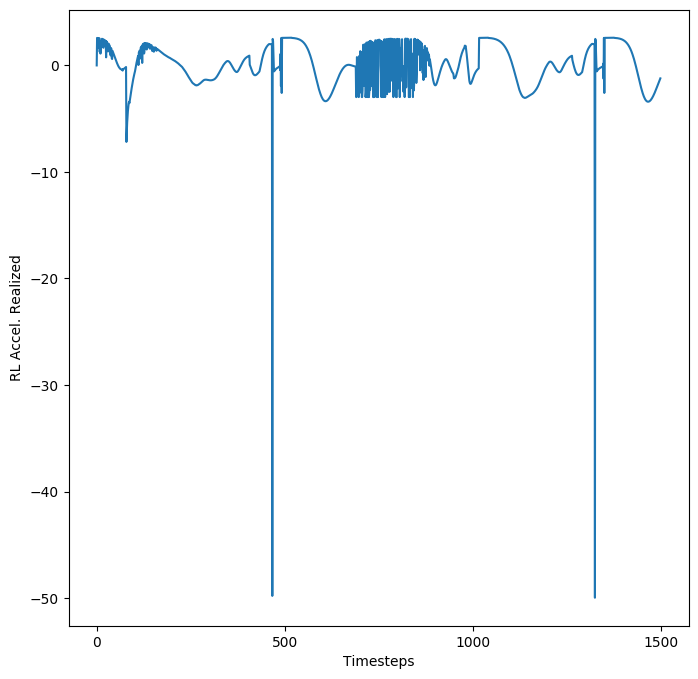

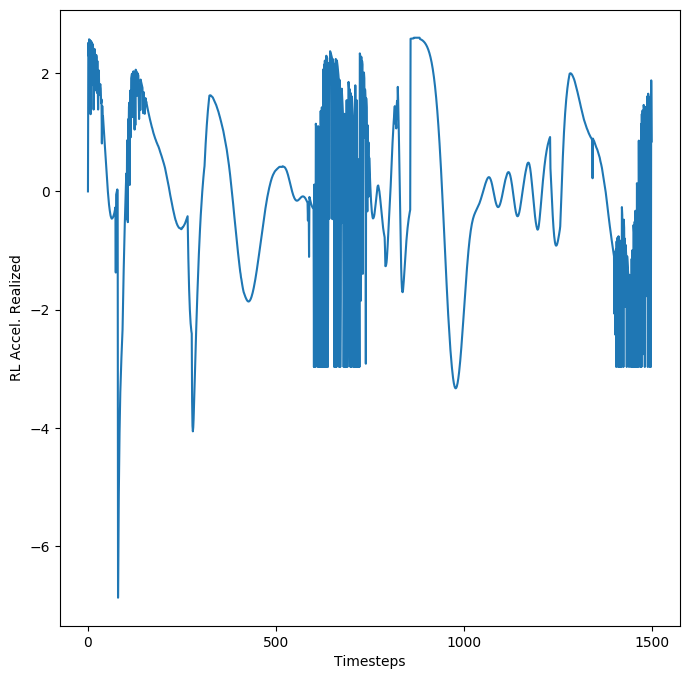

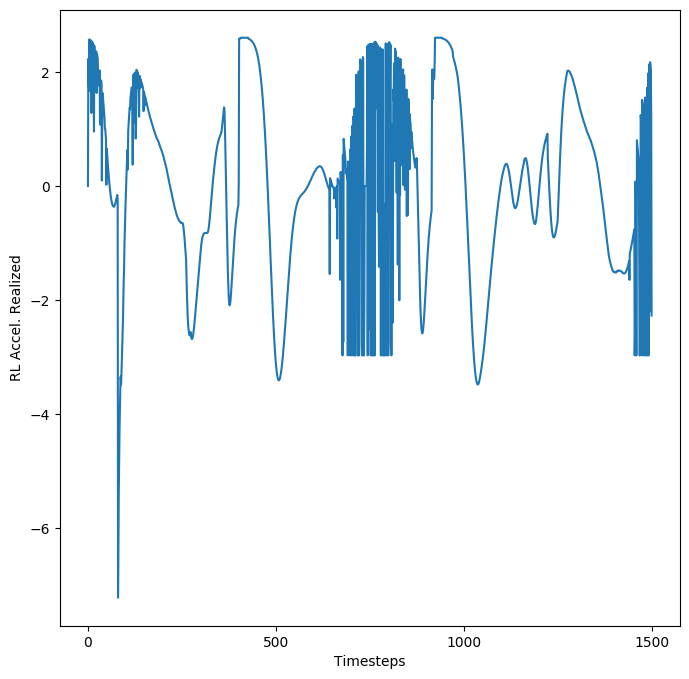

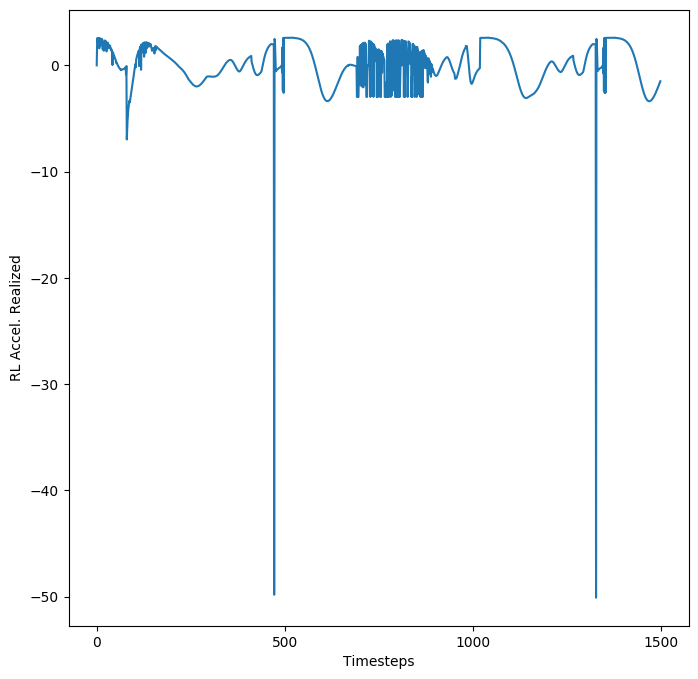

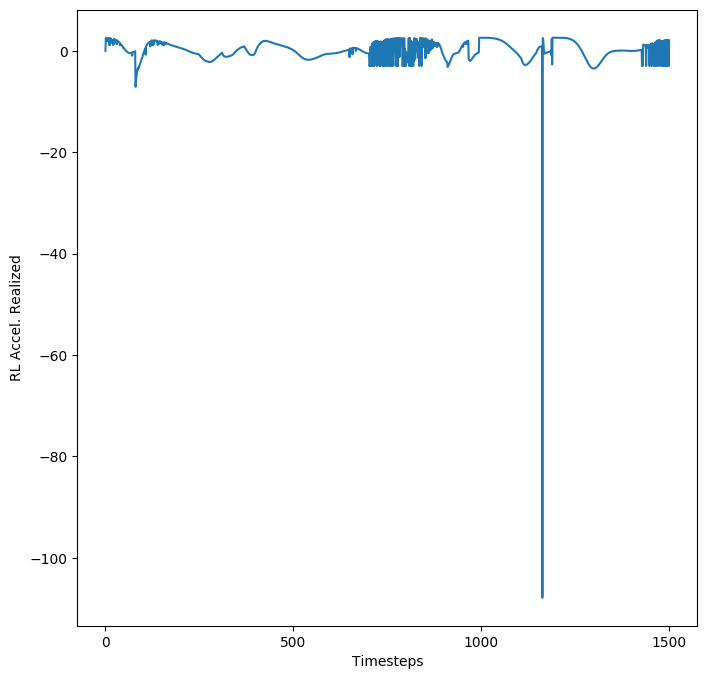

In [8]:
import numpy as np
import matplotlib.pyplot as plt

with open(f"./michael_files/{results_dir_name}/rl_accel_realized.txt", "r+") as f:
    count = 0
    for line in f:
        data = line.split(",")
        data = data[:len(data)-1]
        data = np.asarray([float(i) for i in data])

        fig, ax = plt.subplots(figsize=(8,8), dpi=100)
        xticks = np.arange(0,len(data)+1,500)
        ax.set_ylabel("RL Accel. Realized")
        ax.set_xlabel("Timesteps")
        ax.plot(data)
        ax.set_xticks(xticks) 
        fig.savefig(f"./michael_files/{results_dir_name}/rl_accel_realized{count}.png")
        
        count += 1